<h3>Louis Orozco</h3>
<h3>10/17/2024</h3>
<h3>CMP-262</h3>
<h3>Project 1 Part 3</h3>
The purpose of this assignement is to perform data cleaning using pandas on the project 1 datasheet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load CSV**.

In [3]:
# Read the csv file and store as a new DF
fall_2024_cleaned = pd.read_csv('Non_Maj_cleaned_survey_data_2024.csv')

**For students interested in taking computing classes which computing courses are of most interest?**

C:\Users\Louis\AppData\Local\Temp\ipykernel_6040\2383879060.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  count_df = interested_students[course_columns].replace({'Yes': 1, 'No': 0})


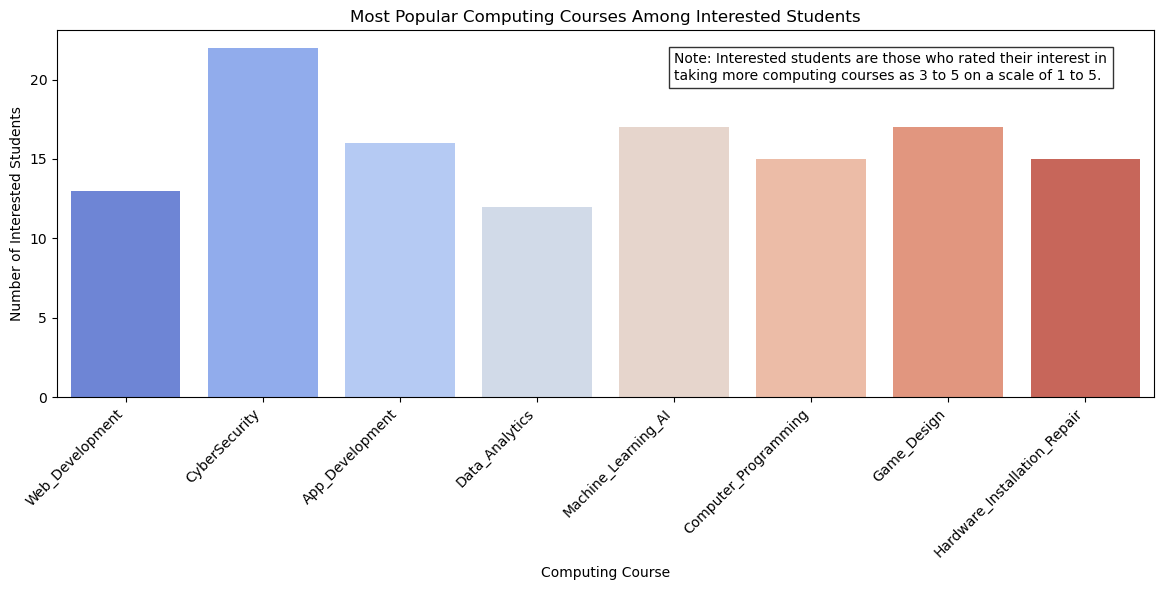

In [29]:
# Filter students with interest (3 to 5) in taking more computing courses
interested_students = fall_2024_cleaned[fall_2024_cleaned['Q10_Interest_More_Courses'].isin([3, 5])]

# Columns related to specific computing courses
course_columns = [col for col in fall_2024_cleaned.columns if col.startswith('Q11_')]

# Convert 'Yes'/'No' to binary values (1 for Yes, 0 for No)
count_df = interested_students[course_columns].replace({'Yes': 1, 'No': 0})

# Sum the 'Yes' responses for each course
course_counts = count_df.sum().reset_index()
course_counts.columns = ['Course', 'Interest Count']
course_counts['Course'] = course_counts['Course'].str.replace('Q11_', '', regex=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=course_counts, x='Course', y='Interest Count', hue='Course', palette='coolwarm')

# Add title and labels
plt.title('Most Popular Computing Courses Among Interested Students')
plt.xlabel('Computing Course')
plt.ylabel('Number of Interested Students')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.text(x=4, y= 20,
         s='Note: Interested students are those who rated their interest in\n'
            'taking more computing courses as 3 to 5 on a scale of 1 to 5.',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.tight_layout()
plt.show()

**Cybersecurity had the most interest amongst students that showed interest in taking more courses, while most other courses seemed to have a relatively even amount of interest**

**What are the relative number of enrollments in the various degree programs?**

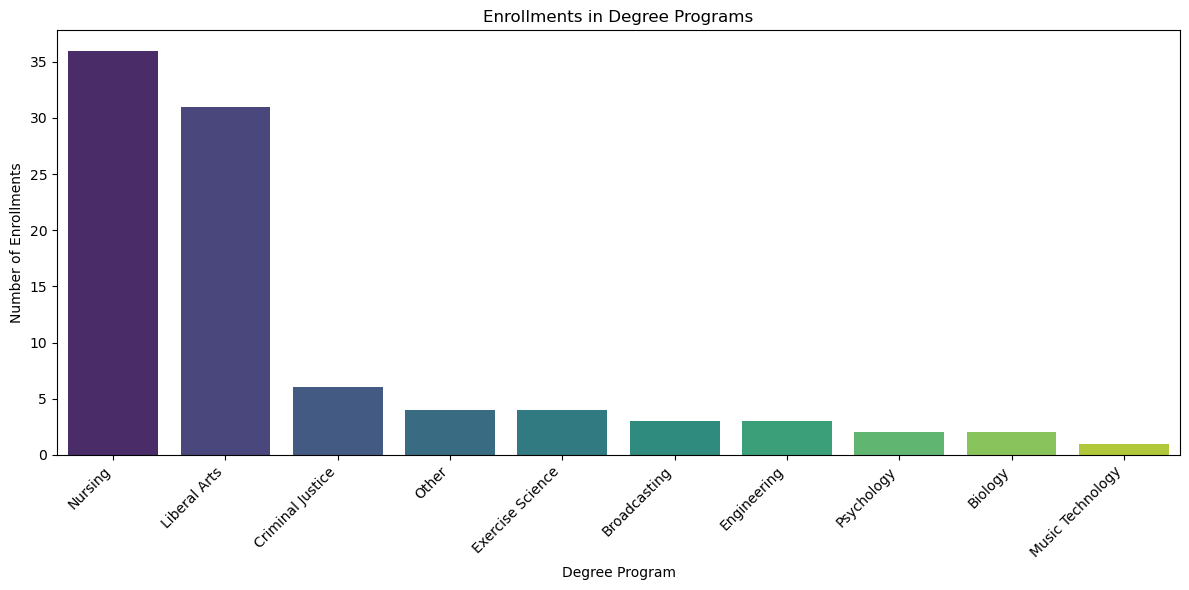

In [21]:

    # Count the frequency of each degree program
degree_counts = fall_2024_cleaned['Q8_Degree_Program'].value_counts().reset_index()
degree_counts.columns = ['Degree Program', 'Enrollments']

    # Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=degree_counts, x='Degree Program', y='Enrollments', hue='Degree Program', palette='viridis')

    # Add title and labels
plt.title('Enrollments in Degree Programs')
plt.xlabel('Degree Program')
plt.ylabel('Number of Enrollments')

    # Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

    # Show the plot
plt.tight_layout()
plt.show()



**Nursing and Liberal Arts had the most enrollment by a wide margin amongst students taking computer science courses, other majors showed very little enrollment in computer science courses.**

**For which degree programs are students the most interested in taking computing classes?**

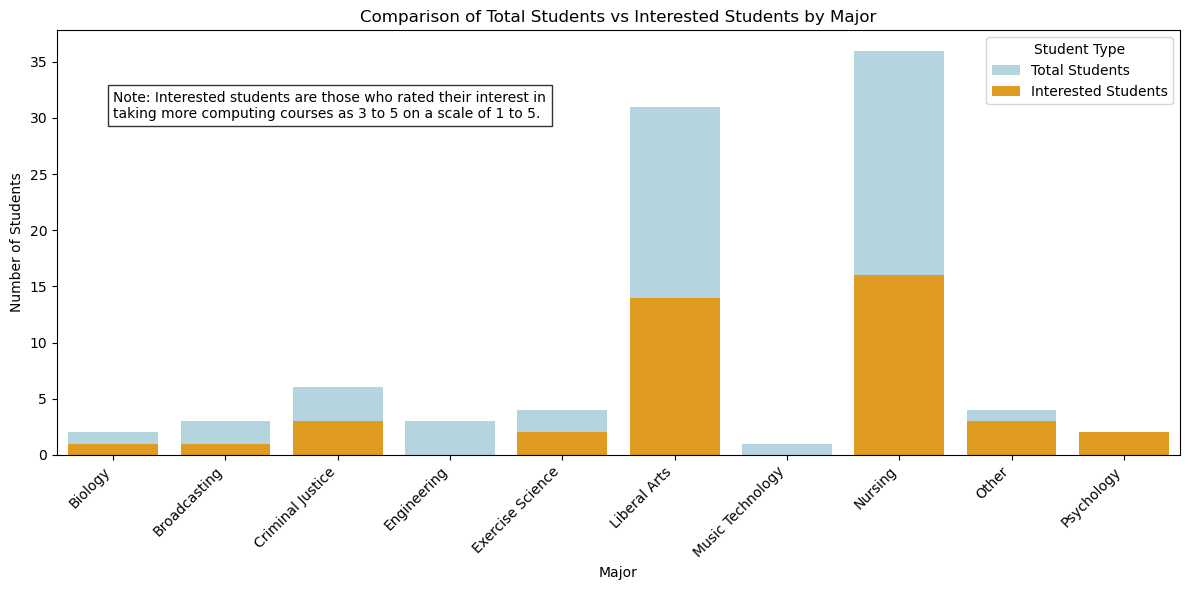

In [7]:
# Load the majors data
majors_column = 'Q8_Degree_Program'  # Adjust this based on the actual column name

# Count the total number of students per major
total_students_count = fall_2024_cleaned[majors_column].value_counts().reset_index()
total_students_count.columns = ['Major', 'Total Student Count']

# Filter for interested students
interested_students = fall_2024_cleaned[fall_2024_cleaned['Q10_Interest_More_Courses'].isin([3, 5])]
interested_students_count = interested_students[majors_column].value_counts().reset_index()
interested_students_count.columns = ['Major', 'Interested Student Count']

# Merge the two counts into a single DataFrame
merged_counts = pd.merge(total_students_count, interested_students_count, on='Major', how='outer').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for total students
sns.barplot(data=merged_counts, x='Major', y='Total Student Count', color='lightblue', label='Total Students')

# Overlay bar plot for interested students
sns.barplot(data=merged_counts, x='Major', y='Interested Student Count', color='orange', label='Interested Students')

# Adding titles and labels
plt.title('Comparison of Total Students vs Interested Students by Major')
plt.xlabel('Major')
plt.ylabel('Number of Students')
plt.legend(title='Student Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.text(x=0, y= 30,
         s='Note: Interested students are those who rated their interest in\n'
            'taking more computing courses as 3 to 5 on a scale of 1 to 5.',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.tight_layout()
plt.show()

**Relatively half of all the students showed interest in taking another computer course, while Engineering and Music Technology majors seemed to show very little interest.**

**Which events or activities prior to applying to CCM are most correlated with enrollment in computing classes?**

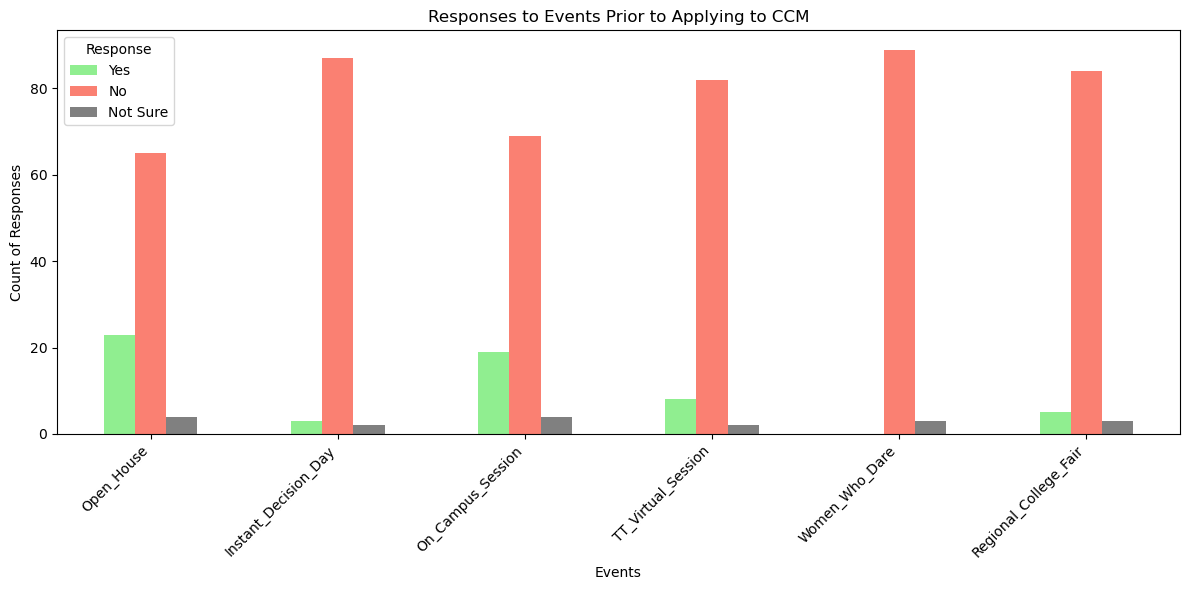

In [23]:
# Define the columns for events
event_columns = [col for col in fall_2024_cleaned.columns if col.startswith('Q4_')]

# Initialize a DataFrame to hold the counts of responses for each event
event_counts_df = pd.DataFrame()

# Count the responses for each event
for event in event_columns:
    counts = fall_2024_cleaned[event].value_counts()
    counts = counts.reindex(['Yes', 'No', 'Not Sure'], fill_value=0)
    event_counts_df[event] = counts

# Transpose the DataFrame to have events as rows and responses as columns
event_counts_df = event_counts_df.T
event_counts_df.columns = ['Yes', 'No', 'Not Sure']  # Rename columns for clarity
event_counts_df.index = [event.replace('Q4_', '') for event in event_counts_df.index]

# Plotting the results
event_counts_df.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'salmon', 'gray'])
plt.title('Responses to Events Prior to Applying to CCM')
plt.xlabel('Events')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.legend(title='Response')
plt.show()

**The Open house and On Campus Session events had the most effect on students enrolling in computer classes when entering CCM, while the Women Who Dare event had no effect in having students enroll in computer classes.**